### Linear Regression with Maps

Often, in climate analysis:

* We perform linear regression between an index and the time series of anomalies at each gridpoint.  

* Because we use anomalies, *b* is zero (or very nearly so), so the slope is all we need.

* We make maps of the slope (also called regression coefficient) as a measure of the direction and strength of the linear relationship.  

* We then stipple or mask where this relationship is significant.   

We will continue with our previous example of looking at the relationship between the Nino3.4 index and precipitation anomalies. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [3]:
file='/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 496)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [4]:
ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1982-01-01 1982-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [5]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 0.01149 0.02916 ... -0.2741 -0.2252

### Linear Regression

In [6]:
from scipy.stats import linregress

In [7]:
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
m_array=np.zeros((ny,nx))

x=ds_nino34['sst']

for i in range(nx):
    for j in range(ny):
        

        y=ds_anoms['precip'][:,j,i]
        
        m,b,r,p,e = linregress(x,y)
        
        m_array[j,i]=m
        r_array[j,i]=r
        p_array[j,i]=p
        

### Make a mask 

where our regression coefficient is significantly different from zero

In [8]:
mask_sig=np.where(p_array<0.05,m_array,np.nan)

### Plot the regression coefficient 

Text(0.5, 1.0, 'Regression between Nino3.4 and Precipitation Anomalies')

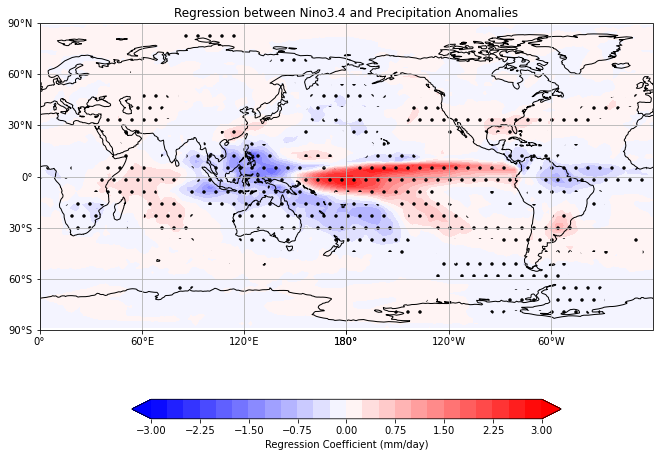

In [9]:
clevs=np.arange(-3,3.25,0.25)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,ds_anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/day)')

# Add title
plt.title('Regression between Nino3.4 and Precipitation Anomalies')

## Final Note on Regression

The correlation coefficient and regression coefficient tell us similar information about the linear relationship between our two datasets.  

The benefit of a linear regression is that we get a measure of that relationship in the form of the regression coefficient. 

The slope (and intercept) of the line also provide us a linear model of this relationship.  If we have a _good_ model, then we can predict the value of $y$ based on new values of $x$. What consitutes a _good_ model and when, how I should use a linear regression as a prediction model, and lots of other details is left to a statistics class. 

### Write data to a .nc file

Suppose I wanted to write out my new regression calculation to a file (or apply some xarray function to my data).  If I had an `xarray.Dataset`,  I would do the following:

`ds.to_netcdf('regression.nc')`

but, m_array is not an `xarray.Dataset`.  How can I make it one?

In [10]:
ds_m=xr.DataArray(m_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                  dims=['lat','lon'])        
ds_m=ds_m.to_dataset(name='slope')
ds_m

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    slope    (lat, lon) float64 -0.01486 -0.0172 ... -0.005907 -0.006641

Suppose I wanted to put m,r,and p into an `xarray.Dataset` together, I can repeat this for all of them (m,r,p)

In [11]:
ds_p=xr.DataArray(p_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_p=ds_p.to_dataset(name='pvalue')
ds_p

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    pvalue   (lat, lon) float64 0.2249 0.158 0.2368 ... 0.4285 0.7514 0.7207

In [12]:
ds_r=xr.DataArray(r_array,
                  coords={'lat':ds_anoms['lat'],
                          'lon': ds_anoms['lon']},
                          dims=['lat','lon'])        
ds_r=ds_r.to_dataset(name='rvalue')
ds_r

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    rvalue   (lat, lon) float64 -0.05694 -0.06623 -0.05551 ... -0.01488 -0.01679

I can then merge them together. Note they must have different variable names or `xarray` doesn't know what to do with them.

In [13]:
ds_regr=xr.merge([ds_m,ds_p,ds_r])
ds_regr

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    slope    (lat, lon) float64 -0.01486 -0.0172 ... -0.005907 -0.006641
    pvalue   (lat, lon) float64 0.2249 0.158 0.2368 ... 0.4285 0.7514 0.7207
    rvalue   (lat, lon) float64 -0.05694 -0.06623 -0.05551 ... -0.01488 -0.01679

Now I can write them to a single .nc file

In [14]:
ds_regr.to_netcdf('regression.nc')

In [15]:
ds_check=xr.open_dataset('regression.nc')
ds_check

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    slope    (lat, lon) float64 ...
    pvalue   (lat, lon) float64 ...
    rvalue   (lat, lon) float64 ...

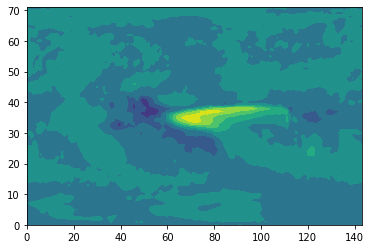

In [16]:
plt.contourf(ds_check['slope'])